In [1]:
# A brief of goibibo

In [2]:
'''
Goibibo was launched in 2009 and is part of ibibo Group. It was co-founded by Sanjay Bhasin and Vikalp Sahni.[5] Goibibo is 
India's largest hotels aggregation and also one of the leading air aggregator. Goibibo's core value differentiation is delivery
of the fastest and the most trusted and reliable user experiences. Goibibo is also the number one ranked mobile app under the 
travel category. Goibibo.com was awarded 'The Best Tech Travel Aggregator Brand Award 2015[6] by The Economic Times.

'''

"\nGoibibo was launched in 2009 and is part of ibibo Group. It was co-founded by Sanjay Bhasin and Vikalp Sahni.[5] Goibibo is \nIndia's largest hotels aggregation and also one of the leading air aggregator. Goibibo's core value differentiation is delivery\nof the fastest and the most trusted and reliable user experiences. Goibibo is also the number one ranked mobile app under the \ntravel category. Goibibo.com was awarded 'The Best Tech Travel Aggregator Brand Award 2015[6] by The Economic Times.\n\n"

In [3]:
# Importing all required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,roc_curve, auc ,accuracy_score,cohen_kappa_score,confusion_matrix,classification_report,recall_score,precision_score
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
import sklearn.feature_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
import pandas_profiling
from sklearn.metrics import mean_absolute_error
from pandas.plotting import scatter_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures

In [5]:
pd.pandas.set_option('display.max_columns',None)

In [177]:
pd.pandas.set_option('display.max_rows',None)

In [6]:
# Loading dataset

In [7]:
go=pd.read_excel("goibibo.xls")

In [8]:
# Loading extended dataset

In [9]:
og=pd.read_excel("goext.xlsx")

In [10]:
# concating both dataset

In [11]:
go=pd.concat([go,og],axis=1)

In [12]:
# Looking at first few rows

In [13]:
go.head(3)

,additional_info,address,area,city,guest_recommendation,hotel_brand,hotel_category,hotel_description,hotel_facilities,hotel_star_rating,image_count,latitude,longitude,point_of_interest,property_name,property_type,province,review_count_by_category,room_area,room_count,room_facilities,room_type,site_review_count,site_review_rating,site_stay_review_rating,state,total_add_info,total_hotel_facility,total_point_of_interest,total_room_facility,service_quality_rating,amenities_rating,food_rating,value_for_money_rating,location_rating,cleanliness_rating
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,85.0,NaN,gostays,The standard check-in time is 12:00 PM and the...,Doctor on Call|Dry Cleaning|Laundry Service Av...,2,20,32.139387,77.154660,Hadimba Temple|Naggar Village|Himalayan Nyingm...,Baragarh Regency,Resort,Manali,positive reviews::74|critical reviews::13|revi...,NaN,17,Room Service |Basic Bathroom Amenities|Cable /...,Deluxe Room,87.0,4.0,Service Quality::3.9|Amenities::3.7|Food and D...,Himachal Pradesh,4,36,18,39,3.9,3.7,3.8,4.1,4.0,4.1
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,87.0,NaN,regular,The standard check-in time is 12:00 PM and the...,Airport Transfer Available / Surcharge|Banquet...,0,17,28.472097,77.072546,Sushant Lok|Sahara Mall|Amity International Sc...,Asian Suites A- 585,Guest House,Gurgaon,positive reviews::8|critical reviews::0|review...,14 X 12 Sq.ft.,18,Room Service |Air Conditioning |Basic Bathroom...,Deluxe Room With Free WIFI,8.0,4.5,Service Quality::4.7|Amenities::4.7|Food and D...,Haryana,2,16,3,25,4.7,4.7,4.3,4.7,4.8,4.8
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,50.0,NaN,regular,The standard check-in time is 12:00 PM and the...,Swimming Pool|Bar / Lounge |Laundry Service Av...,0,28,15.548398,73.757634,"Anjuna Beach|Calangute Beach|Titos lane, baga|...",Bevvan Resort,Resort,Goa,positive reviews::1|critical reviews::1|review...,NaN,15,Room Service |Air Conditioning |Cable / Satell...,Standard Room,2.0,2.5,Service Quality::2.5|Amenities::2.5|Food and D...,Goa,2,4,8,18,2.5,2.5,1.0,2.5,2.5,1.0


In [14]:
# Looking at last few rows

In [15]:
go.tail(3)

,additional_info,address,area,city,guest_recommendation,hotel_brand,hotel_category,hotel_description,hotel_facilities,hotel_star_rating,image_count,latitude,longitude,point_of_interest,property_name,property_type,province,review_count_by_category,room_area,room_count,room_facilities,room_type,site_review_count,site_review_rating,site_stay_review_rating,state,total_add_info,total_hotel_facility,total_point_of_interest,total_room_facility,service_quality_rating,amenities_rating,food_rating,value_for_money_rating,location_rating,cleanliness_rating
3997,Room Service|Restaurant,"Marol Maroshi Road, Near To Marol naka FireBri...",Andheri,Mumbai,83.0,NaN,regular,The standard check-in time is 12:00 PM and the...,Banquet Facilities|Bar / Lounge |Currency Exch...,3,19,19.110926,72.879038,Mount Mary Church|Juhu Beach|Domestic Airport|...,Hotel Silver Inn,Hotel,Mumbai,positive reviews::64|critical reviews::13|revi...,NaN,41,Air Conditioning |Cable / Satellite / Pay TV a...,Gold Room,77.0,4.0,Service Quality::3.9|Amenities::3.8|Food and D...,Maharashtra,2,15,15,7,3.9,3.8,4.0,4.0,4.0,4.2
3998,Room Service,"Station Road, B Deoghar Ho, Deoghar Jharkhand",Railway Station Road,Deoghar,NaN,NaN,regular,The standard check-in time is 02:00 PM and the...,Business Center |Disabled Friendly Facilities ...,1,9,24.511849,86.696999,Ramakrishna Mission Vidyapeeth|Shivaganga|Rail...,Hotel Shivam International,Hotel,Deoghar,NaN,NaN,4,Room Service |Air Conditioning |Alarm Clock|Ba...,AC DELUXE ROOM,NaN,NaN,Service Quality::|Amenities::|Food and Drinks:...,Jharkhand,1,10,3,11,NaN,NaN,NaN,NaN,NaN,NaN
3999,Room Service|Restaurant,"N.H 6, A.Katapali, Near Gosala",Katapali,Sambalpur,50.0,NaN,regular,The standard check-in time is 10:00 AM and the...,Business Center |Doctor on Call|Parking Facili...,2,6,21.448978,83.912502,Katapali,Hotel Silver Moon,Hotel,Sambalpur,positive reviews::2|critical reviews::0|review...,NaN,8,Room Service |Basic Bathroom Amenities| Hot / ...,Deluxe AC Room,2.0,4.3,Service Quality::4.3|Amenities::4.3|Food and D...,Orissa,2,10,1,6,4.3,4.3,4.3,4.3,4.3,4.3


In [16]:
# Listing all columns

In [17]:
go.columns

Index(['additional_info', 'address', 'area', 'city', 'guest_recommendation',
       'hotel_brand', 'hotel_category', 'hotel_description',
       'hotel_facilities', 'hotel_star_rating', 'image_count', 'latitude',
       'longitude', 'point_of_interest', 'property_name', 'property_type',
       'province', 'review_count_by_category', 'room_area', 'room_count',
       'room_facilities', 'room_type', 'site_review_count',
       'site_review_rating', 'site_stay_review_rating', 'state',
       'total_add_info', 'total_hotel_facility', 'total_point_of_interest',
       'total_room_facility', 'service_quality_rating', 'amenities_rating',
       'food_rating', 'value_for_money_rating', 'location_rating',
       'cleanliness_rating'],
      dtype='object')

In [18]:
# shape of dataset

In [19]:
go.shape

(4000, 36)

In [20]:
# data type of all columns

In [21]:
go.dtypes

additional_info              object
address                      object
area                         object
city                         object
guest_recommendation        float64
hotel_brand                  object
hotel_category               object
hotel_description            object
hotel_facilities             object
hotel_star_rating             int64
image_count                   int64
latitude                    float64
longitude                   float64
point_of_interest            object
property_name                object
property_type                object
province                     object
review_count_by_category     object
room_area                    object
room_count                    int64
room_facilities              object
room_type                    object
site_review_count           float64
site_review_rating          float64
site_stay_review_rating      object
state                        object
total_add_info                int64
total_hotel_facility        

In [22]:
# brief summary of dataset

In [23]:
pd.DataFrame({"Tot_Missing":go.isna().sum(),"% missing":go.isna().mean(),"Datatype":go.dtypes,"Unique":go.nunique()})

,Tot_Missing,% missing,Datatype,Unique
additional_info,808,0.20200,object,57
address,0,0.00000,object,3971
area,35,0.00875,object,1415
city,0,0.00000,object,558
guest_recommendation,1584,0.39600,float64,70
hotel_brand,3611,0.90275,object,95
hotel_category,0,0.00000,object,2
hotel_description,17,0.00425,object,1828
hotel_facilities,194,0.04850,object,3370
hotel_star_rating,0,0.00000,int64,6


In [24]:
# Looking at missing values in graph

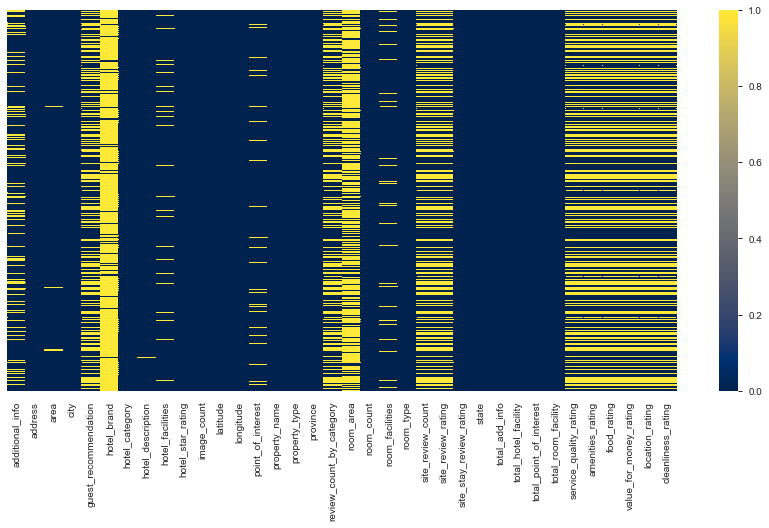

In [25]:
fig=plt.figure(figsize=(15,7))
sns.heatmap(go.isnull(), yticklabels=False, cbar=True, cmap='cividis')

In [26]:
# basic stats value

In [27]:
go.describe()

,guest_recommendation,hotel_star_rating,image_count,latitude,longitude,room_count,site_review_count,site_review_rating,total_add_info,total_hotel_facility,total_point_of_interest,total_room_facility,service_quality_rating,amenities_rating,food_rating,value_for_money_rating,location_rating,cleanliness_rating
count,2416.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,2416.000000,2416.000000,4000.000000,4000.000000,4000.000000,4000.00000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000
mean,75.537666,1.306000,12.995500,21.288213,77.432995,22.200250,47.765728,3.750993,1.973000,16.991500,6.327250,12.36050,3.708858,3.651490,3.731664,3.768129,3.839818,3.818253
std,22.698935,1.479159,11.631113,7.576905,4.506588,96.132138,93.233924,0.842863,1.556399,17.611004,7.456377,12.08193,0.876821,0.872438,0.966732,0.871962,0.832450,0.966808
min,0.000000,0.000000,0.000000,8.080476,12.939682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,6.000000,13.748553,74.723694,7.000000,4.000000,3.400000,1.000000,5.000000,1.000000,5.00000,3.300000,3.300000,3.300000,3.400000,3.500000,3.400000
50%,80.000000,1.000000,9.000000,22.225083,76.967365,14.000000,17.000000,3.900000,2.000000,11.000000,4.000000,8.00000,3.900000,3.800000,4.000000,4.000000,4.000000,4.000000
75%,90.000000,3.000000,17.000000,28.018203,78.286097,26.000000,55.000000,4.300000,3.000000,22.000000,8.000000,18.00000,4.300000,4.200000,4.400000,4.300000,4.400000,4.500000
max,100.000000,5.000000,129.000000,79.608077,95.346775,5874.000000,2094.000000,5.000000,6.000000,138.000000,57.000000,129.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [28]:
# Lets drop those variables whose null values are more than 30 %

In [29]:
go.drop(["guest_recommendation","hotel_brand","room_area","site_review_count","site_review_rating"],axis=1,inplace=True)

In [30]:
# we have not removed the total rating columns as we can impute values over there and it plays important role in predicting
# target variable

In [31]:
# new shape of dataset

In [32]:
go.shape

(4000, 31)

In [33]:
# Lets consider hoter star rating as our target variable

In [34]:
# as this is a mix dataset of many values under a single varible we proceed to process each column individually

In [35]:
# additional info

In [36]:
# we have taken count of additional facilty as one column so we are dropping this col

In [37]:
go.additional_info.head(5)

0    Room Service|Internet Access|Restaurant|Free I...
1                                 Room Service|Gym/Spa
2                             Restaurant|Swimming Pool
3                                                  NaN
4                           Internet Access|Restaurant
Name: additional_info, dtype: object

In [38]:
go.drop("additional_info",axis=1,inplace=True)

In [39]:
# address

In [40]:
go.address.head(3)

0    15th Mile, N.H.21,Manali, District Kullu,Himac...
1    A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...
2    Cobra Vaddo,Calungate Baga Road, Bardez, Calan...
Name: address, dtype: object

In [41]:
# dropping address col as its not useful in predicting target variable

In [42]:
go.drop("address",axis=1,inplace=True)

In [43]:
# area

In [44]:
go.area.head(3)

0            Others
1       Sushant Lok
2    Calangute Area
Name: area, dtype: object

In [45]:
# dropping area col as its not useful in predicting target variable

In [46]:
go.drop("area",axis=1,inplace=True)

In [47]:
# city

In [48]:
go.city.head(3)

0     Manali
1    Gurgaon
2        Goa
Name: city, dtype: object

In [49]:
# Label encoding city variable

In [50]:
le=LabelEncoder()
go["city"]=le.fit_transform(go["city"])

In [51]:
# hotel category

In [52]:
go.hotel_category.head(3)

0    gostays
1    regular
2    regular
Name: hotel_category, dtype: object

In [53]:
# applying One Hot Encoder 

In [54]:
ohe=OneHotEncoder()
ohe.fit(go["hotel_category"].values.reshape(-1,1))
ohe_hc=ohe.transform(go["hotel_category"].values.reshape(-1,1))
ohe_df=pd.DataFrame(ohe_hc.toarray(),columns=["gostays","regular"])

In [55]:
# concating with our dataset

In [56]:
go=pd.concat([go,ohe_df],axis=1)

In [57]:
go.head(3)

,city,hotel_category,hotel_description,hotel_facilities,hotel_star_rating,image_count,latitude,longitude,point_of_interest,property_name,property_type,province,review_count_by_category,room_count,room_facilities,room_type,site_stay_review_rating,state,total_add_info,total_hotel_facility,total_point_of_interest,total_room_facility,service_quality_rating,amenities_rating,food_rating,value_for_money_rating,location_rating,cleanliness_rating,gostays,regular
0,313,gostays,The standard check-in time is 12:00 PM and the...,Doctor on Call|Dry Cleaning|Laundry Service Av...,2,20,32.139387,77.154660,Hadimba Temple|Naggar Village|Himalayan Nyingm...,Baragarh Regency,Resort,Manali,positive reviews::74|critical reviews::13|revi...,17,Room Service |Basic Bathroom Amenities|Cable /...,Deluxe Room,Service Quality::3.9|Amenities::3.7|Food and D...,Himachal Pradesh,4,36,18,39,3.9,3.7,3.8,4.1,4.0,4.1,1.0,0.0
1,182,regular,The standard check-in time is 12:00 PM and the...,Airport Transfer Available / Surcharge|Banquet...,0,17,28.472097,77.072546,Sushant Lok|Sahara Mall|Amity International Sc...,Asian Suites A- 585,Guest House,Gurgaon,positive reviews::8|critical reviews::0|review...,18,Room Service |Air Conditioning |Basic Bathroom...,Deluxe Room With Free WIFI,Service Quality::4.7|Amenities::4.7|Food and D...,Haryana,2,16,3,25,4.7,4.7,4.3,4.7,4.8,4.8,0.0,1.0
2,170,regular,The standard check-in time is 12:00 PM and the...,Swimming Pool|Bar / Lounge |Laundry Service Av...,0,28,15.548398,73.757634,"Anjuna Beach|Calangute Beach|Titos lane, baga|...",Bevvan Resort,Resort,Goa,positive reviews::1|critical reviews::1|review...,15,Room Service |Air Conditioning |Cable / Satell...,Standard Room,Service Quality::2.5|Amenities::2.5|Food and D...,Goa,2,4,8,18,2.5,2.5,1.0,2.5,2.5,1.0,0.0,1.0


In [58]:
# dropping hotel_category

In [59]:
go.drop("hotel_category",axis=1,inplace=True)

In [60]:
# hotel description

In [61]:
go.hotel_description.head(3)

0    The standard check-in time is 12:00 PM and the...
1    The standard check-in time is 12:00 PM and the...
2    The standard check-in time is 12:00 PM and the...
Name: hotel_description, dtype: object

In [62]:
# this columns mainly describes checkin and check out timing, so we need to extract numeric data from text

In [63]:
des=go.hotel_description.str.split(" ",expand=True)

In [64]:
des.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557
0,The,standard,check-in,time,is,12:00,PM,and,the,standard,check-out,time,is,12:00,PM.,Early,check-in,or,late,check-out,is,strictly,subjected,to,availability,and,may,be,chargeable,by,the,hotel.,Any,early,check-in,or,late,check-out,request,must,be,directed,and,reconfirmed,with,hotel,directly,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,N

In [65]:
intime=des[5]

In [66]:
Intime=intime.str.split(":",expand=True)

In [67]:
go["check_in"]=Intime[0]

In [68]:
outtime=des[13]

In [69]:
Outtime=outtime.str.split(":",expand=True)

In [70]:
go["check_out"]=Outtime[0]

In [71]:
# as we have extracted necessary information, we can drop hotel description column

In [72]:
go.drop("hotel_description",axis=1,inplace=True)

In [73]:
# hotel facilities

In [74]:
go.hotel_facilities.head(3)

0    Doctor on Call|Dry Cleaning|Laundry Service Av...
1    Airport Transfer Available / Surcharge|Banquet...
2    Swimming Pool|Bar / Lounge |Laundry Service Av...
Name: hotel_facilities, dtype: object

In [75]:
# we have already taken a count of this column in total_hotel_facility, so we are dropping this col

In [76]:
go.drop("hotel_facilities",axis=1,inplace=True)

In [77]:
# image count

In [78]:
go.image_count.head(5)

0    20
1    17
2    28
3     4
4     6
Name: image_count, dtype: int64

In [79]:
# as this is in integer datatype and no null values present in this column, we leave this as it is

In [80]:
# latitude

In [81]:
go.latitude.head(5)

0    32.139387
1    28.472097
2    15.548398
3    32.223603
4    28.646777
Name: latitude, dtype: float64

In [82]:
# rounding off to 2 decimal points

In [83]:
go["latitude"]=round(go.latitude,2)

In [84]:
# longitude

In [85]:
go.longitude.head(5)

0    77.154660
1    77.072546
2    73.757634
3    77.185900
4    77.212735
Name: longitude, dtype: float64

In [86]:
# rounding off to 2 decimal points

In [87]:
go["longitude"]=round(go.longitude,2)

In [88]:
# point of interest

In [89]:
go.point_of_interest.head(5)

0    Hadimba Temple|Naggar Village|Himalayan Nyingm...
1    Sushant Lok|Sahara Mall|Amity International Sc...
2    Anjuna Beach|Calangute Beach|Titos lane, baga|...
3    The Mall|Tibetian Monastery|Vashisht Hot Baths...
4    Gaffar Market|YMCA Institute|Agrasen Boali|Cha...
Name: point_of_interest, dtype: object

In [90]:
# as we have already taken a count of this column in total_point_of_interest, we are dropping this column

In [91]:
go.drop("point_of_interest",axis=1,inplace=True)

In [92]:
# property name

In [93]:
go.property_name.head(5)

0       Baragarh Regency
1    Asian Suites A- 585
2          Bevvan Resort
3      Apple Inn Cottage
4    Anmol Hotel Pvt.Ltd
Name: property_name, dtype: object

In [94]:
# label encoding this col

In [95]:
le=LabelEncoder()
go["name_of_property"]=le.fit_transform(go["property_name"])

In [96]:
pd.DataFrame({"Old name":go.property_name.unique(),"Encoded value":go.name_of_property.unique()})

,Old name,Encoded value
0,Baragarh Regency,98
1,Asian Suites A- 585,41
2,Bevvan Resort,112
3,Apple Inn Cottage,24
4,Anmol Hotel Pvt.Ltd,13
...,...,...
3800,Hotel Signature,2072
3801,Hotel Shree Anand Restaurant &amp; Bar,2022
3802,Hotel Shreenath Palace,2034
3803,Hotel Silver Inn,2080


In [97]:
# dropping property name col

In [98]:
go.drop("property_name",axis=1,inplace=True)

In [99]:
# property_type

In [100]:
go.property_type.head(5)

0         Resort
1    Guest House
2         Resort
3        Cottage
4          Hotel
Name: property_type, dtype: object

In [101]:
go.property_type.unique()

array(['Resort', 'Guest House', 'Cottage', 'Hotel', 'Homestay', 'Villa',
       'Palace', 'Lodge', 'Houseboat', 'Service Apartment', 'BnB',
       'Hostel', 'Bungalow', 'Tent', 'Luxury Yacht', 'Motel', 'Beach Hut',
       'Farm Stay'], dtype=object)

In [102]:
# Label encoding this col

In [103]:
le=LabelEncoder()
go["type_of_property"]=le.fit_transform(go["property_type"])

In [104]:
pd.DataFrame({"Property type":go.property_type.unique(),"Property code":go.type_of_property.unique()})

,Property type,Property code
0,Resort,14
1,Guest House,5
2,Cottage,3
3,Hotel,8
4,Homestay,6
5,Villa,17
6,Palace,13
7,Lodge,10
8,Houseboat,9
9,Service Apartment,15


In [105]:
# dropping property_type col

In [106]:
go.drop("property_type",axis=1,inplace=True)

In [107]:
# province

In [108]:
go.province.head(5)

0     Manali
1    Gurgaon
2        Goa
3     Manali
4      Delhi
Name: province, dtype: object

In [109]:
# Label encoding this col

In [110]:
le=LabelEncoder()
go["Province"]=le.fit_transform(go["province"])

In [111]:
pd.DataFrame({"Province":go.province.unique(),"Province code":go.Province.unique()})

,Province,Province code
0,Manali,313
1,Gurgaon,182
2,Goa,170
3,Delhi,128
4,Jaipur,210
...,...,...
553,Narnaul,363
554,Patan,396
555,Pilani,408
556,Ichalkaranji,204


In [112]:
# dropping province col

In [113]:
go.drop("province",axis=1,inplace=True)

In [114]:
# review_count_by_category

In [115]:
# as this column is having approx 40 % null values, we are dropping this col from consideration

In [116]:
go.drop("review_count_by_category",axis=1,inplace=True)

In [117]:
# room_count

In [118]:
go.room_count.head(5)

0    17
1    18
2    15
3    24
4    20
Name: room_count, dtype: int64

In [119]:
# No need to process this column as it is already in integer data type

In [120]:
# room_facility

In [121]:
go.room_facilities.head(5)

0    Room Service |Basic Bathroom Amenities|Cable /...
1    Room Service |Air Conditioning |Basic Bathroom...
2    Room Service |Air Conditioning |Cable / Satell...
3    Basic Bathroom Amenities|Cable / Satellite / P...
4    Basic Bathroom Amenities|Cable / Satellite / P...
Name: room_facilities, dtype: object

In [122]:
# we have already taken count of this room facilities in total room facility column, dropping this column

In [123]:
go.drop("room_facilities",axis=1,inplace=True)

In [124]:
# room_type

In [125]:
go.room_type.head(5)

0                   Deluxe Room
1    Deluxe Room With Free WIFI
2                 Standard Room
3                   Deluxe Room
4          Standard Room Non AC
Name: room_type, dtype: object

In [126]:
go.room_type.unique()

array(['Deluxe Room', 'Deluxe Room With Free WIFI', 'Standard Room', ...,
       'Standard Executive Room', 'Two bed AC Room', 'Gold Room'],
      dtype=object)

In [127]:
# applying label encoder on this column

In [128]:
le=LabelEncoder()
go["Room_type"]=le.fit_transform(go["room_type"])

In [129]:
pd.DataFrame({"Room type":go.room_type.unique(),"Room code":go.Room_type.unique()})

,Room type,Room code
0,Deluxe Room,378
1,Deluxe Room With Free WIFI,403
2,Standard Room,1061
3,Standard Room Non AC,1079
4,Semi Deluxe,949
...,...,...
1292,Double bedded,531
1293,Super Delux Room,1117
1294,Standard Executive Room,1031
1295,Two bed AC Room,1219


In [130]:
# dropping room_type column

In [131]:
go.drop("room_type",axis=1,inplace=True)

In [132]:
# site_stay_review_rating

In [133]:
go.site_stay_review_rating.head(5)

0    Service Quality::3.9|Amenities::3.7|Food and D...
1    Service Quality::4.7|Amenities::4.7|Food and D...
2    Service Quality::2.5|Amenities::2.5|Food and D...
3    Service Quality::5.0|Amenities::5.0|Food and D...
4    Service Quality::2.7|Amenities::2.6|Food and D...
Name: site_stay_review_rating, dtype: object

In [134]:
# we have already processed this column, dropping from dataset

In [135]:
go.drop("site_stay_review_rating",axis=1,inplace=True)

In [136]:
# state

In [137]:
go.state.head(5)

0    Himachal Pradesh
1             Haryana
2                 Goa
3    Himachal Pradesh
4               Delhi
Name: state, dtype: object

In [138]:
# Applying Label encoder to this column

In [139]:
le=LabelEncoder()
go["State"]=le.fit_transform(go["state"])

In [140]:
pd.DataFrame({"State":go.state.unique(),"State code":go.State.unique()})

,State,State code
0,Himachal Pradesh,14
1,Haryana,13
2,Goa,11
3,Delhi,9
4,Rajasthan,30
5,Assam,4
6,Uttar Pradesh,36
7,Tamil Nadu,33
8,Gujarat,12
9,Kerala,20


In [141]:
# dropping state column

In [142]:
go.drop("state",axis=1,inplace=True)

In [143]:
# We have processed every column, lets look at the dataset

In [144]:
go.head(5)

,city,hotel_star_rating,image_count,latitude,longitude,room_count,total_add_info,total_hotel_facility,total_point_of_interest,total_room_facility,service_quality_rating,amenities_rating,food_rating,value_for_money_rating,location_rating,cleanliness_rating,gostays,regular,check_in,check_out,name_of_property,type_of_property,Province,Room_type,State
0,313,2,20,32.14,77.15,17,4,36,18,39,3.9,3.7,3.8,4.1,4.0,4.1,1.0,0.0,12,12,98,14,313,378,14
1,182,0,17,28.47,77.07,18,2,16,3,25,4.7,4.7,4.3,4.7,4.8,4.8,0.0,1.0,12,12,41,5,182,403,13
2,170,0,28,15.55,73.76,15,2,4,8,18,2.5,2.5,1.0,2.5,2.5,1.0,0.0,1.0,12,10,112,14,170,1061,11
3,313,2,4,32.22,77.19,24,0,6,7,5,5.0,5.0,5.0,5.0,5.0,5.0,0.0,1.0,12,12,24,3,313,378,14
4,128,2,6,28.65,77.21,20,2,7,11,6,2.7,2.6,2.5,2.9,2.9,2.6,0.0,1.0,12,12,13,8,128,1079,9


In [145]:
# Now objective is to handle null values in int data type columns

In [146]:
for feature in go.columns:
    if go[feature].dtypes in (["int64","float64"]):
        go[feature].fillna(go[feature].mean(),inplace=True)

In [147]:
go["check_in"]=go["check_in"].fillna(go["check_in"].value_counts().sort_values(ascending=False).index[0])

In [148]:
go["check_out"]=go["check_out"].fillna(go["check_out"].value_counts().sort_values(ascending=False).index[0])

In [149]:
# Lets change the data type of all object columns to int

In [150]:
for feature in go.columns:
    if go[feature].dtypes in (["object"]):
        go[feature]=go[feature].astype(int)

In [151]:
# lets look at the dataset

In [152]:
go.head(10)

,city,hotel_star_rating,image_count,latitude,longitude,room_count,total_add_info,total_hotel_facility,total_point_of_interest,total_room_facility,service_quality_rating,amenities_rating,food_rating,value_for_money_rating,location_rating,cleanliness_rating,gostays,regular,check_in,check_out,name_of_property,type_of_property,Province,Room_type,State
0,313,2,20,32.14,77.15,17,4,36,18,39,3.900000,3.70000,3.800000,4.100000,4.000000,4.100000,1.0,0.0,12,12,98,14,313,378,14
1,182,0,17,28.47,77.07,18,2,16,3,25,4.700000,4.70000,4.300000,4.700000,4.800000,4.800000,0.0,1.0,12,12,41,5,182,403,13
2,170,0,28,15.55,73.76,15,2,4,8,18,2.500000,2.50000,1.000000,2.500000,2.500000,1.000000,0.0,1.0,12,10,112,14,170,1061,11
3,313,2,4,32.22,77.19,24,0,6,7,5,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,0.0,1.0,12,12,24,3,313,378,14
4,128,2,6,28.65,77.21,20,2,7,11,6,2.700000,2.60000,2.500000,2.900000,2.900000,2.600000,0.0,1.0,12,12,13,8,128,1079,9
5,170,3,12,15.56,73.75,15,2,15,8,0,3.900000,3.80000,4.700000,3.900000,4.400000,4.600000,0.0,1.0,2,12,92,14,170,949,11
6,128,2,3,28.54,77.26,10,1,6,20,7,3.708858,3.65149,3.731664,3.768129,3.839818,3.818253,0.0,1.0,12,12,94,8,128,308,9
7,128,3,20,28.65,77.19,24,4,64,24,27,4.000000,3.90000,4.100000,4.000000,4.000000,4.100000,1.0,0.0,12,12,59,8,128,215,9
8,210,1,5,26.90,75.75,2,0,4,3,6,4.000000,2.00000,3.000000,1.000000,4.000000,3.000000,0.0,1.0,2,12,32,6,210,1101,30
9,128,0,6,28.57,77.22,4,0,3,32,2,3.708858,3.65149,3.731664,3.768129,3.839818,3.818253,0.0,1.0,2,12,29,6,128,292,9


In [153]:
go["gostays"]=go.gostays.astype(int)

In [154]:
go["regular"]=go.regular.astype(int)

In [155]:
# we need to round of decimals of some columns to 1 decimal place

In [156]:
rating=["service_quality_rating","amenities_rating","food_rating","value_for_money_rating","location_rating","cleanliness_rating"]

In [157]:
for feature in go[rating]:
    go[feature]=round(go[feature],1)

In [158]:
# lets look at the final dataset 

In [159]:
go.head(10)

,city,hotel_star_rating,image_count,latitude,longitude,room_count,total_add_info,total_hotel_facility,total_point_of_interest,total_room_facility,service_quality_rating,amenities_rating,food_rating,value_for_money_rating,location_rating,cleanliness_rating,gostays,regular,check_in,check_out,name_of_property,type_of_property,Province,Room_type,State
0,313,2,20,32.14,77.15,17,4,36,18,39,3.9,3.7,3.8,4.1,4.0,4.1,1,0,12,12,98,14,313,378,14
1,182,0,17,28.47,77.07,18,2,16,3,25,4.7,4.7,4.3,4.7,4.8,4.8,0,1,12,12,41,5,182,403,13
2,170,0,28,15.55,73.76,15,2,4,8,18,2.5,2.5,1.0,2.5,2.5,1.0,0,1,12,10,112,14,170,1061,11
3,313,2,4,32.22,77.19,24,0,6,7,5,5.0,5.0,5.0,5.0,5.0,5.0,0,1,12,12,24,3,313,378,14
4,128,2,6,28.65,77.21,20,2,7,11,6,2.7,2.6,2.5,2.9,2.9,2.6,0,1,12,12,13,8,128,1079,9
5,170,3,12,15.56,73.75,15,2,15,8,0,3.9,3.8,4.7,3.9,4.4,4.6,0,1,2,12,92,14,170,949,11
6,128,2,3,28.54,77.26,10,1,6,20,7,3.7,3.7,3.7,3.8,3.8,3.8,0,1,12,12,94,8,128,308,9
7,128,3,20,28.65,77.19,24,4,64,24,27,4.0,3.9,4.1,4.0,4.0,4.1,1,0,12,12,59,8,128,215,9
8,210,1,5,26.90,75.75,2,0,4,3,6,4.0,2.0,3.0,1.0,4.0,3.0,0,1,2,12,32,6,210,1101,30
9,128,0,6,28.57,77.22,4,0,3,32,2,3.7,3.7,3.7,3.8,3.8,3.8,0,1,2,12,29,6,128,292,9


In [160]:
# detailed summary of dataset

In [161]:
pd.DataFrame({"Total missing":go.isna().sum(),"% missing":go.isna().mean(),"Data type":go.dtypes})

,Total missing,% missing,Data type
city,0,0.0,int32
hotel_star_rating,0,0.0,int64
image_count,0,0.0,int64
latitude,0,0.0,float64
longitude,0,0.0,float64
room_count,0,0.0,int64
total_add_info,0,0.0,int64
total_hotel_facility,0,0.0,int64
total_point_of_interest,0,0.0,int64
total_room_facility,0,0.0,int64


In [162]:
# Data Visualization

In [163]:
# histogram

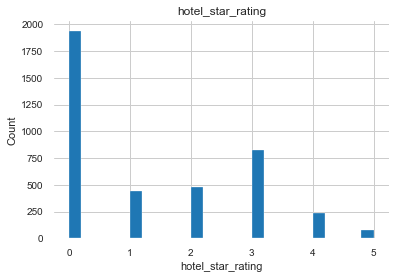

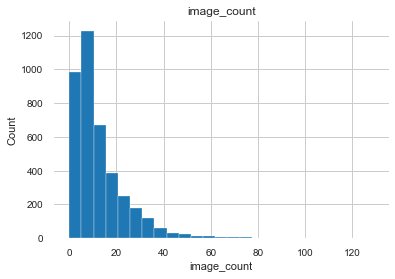

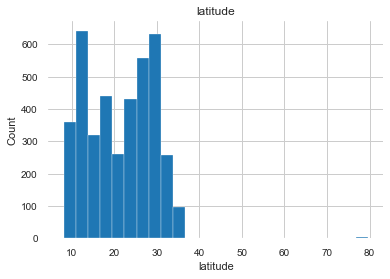

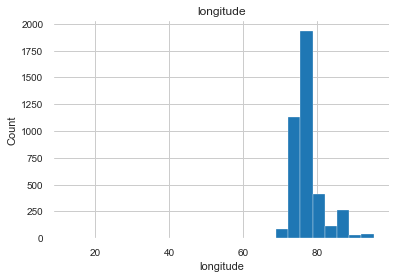

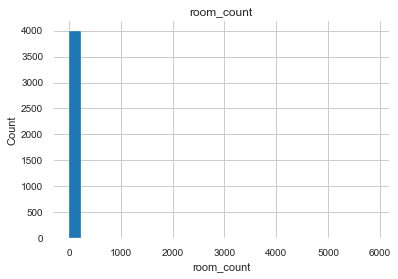

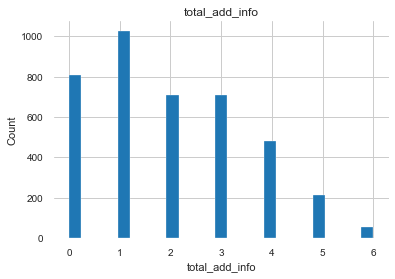

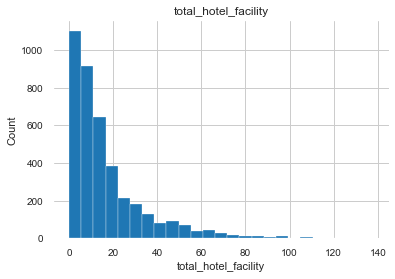

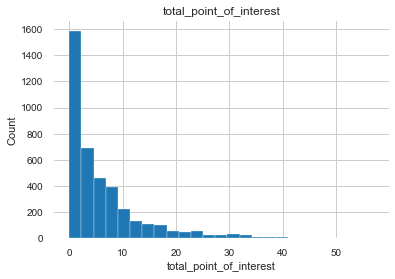

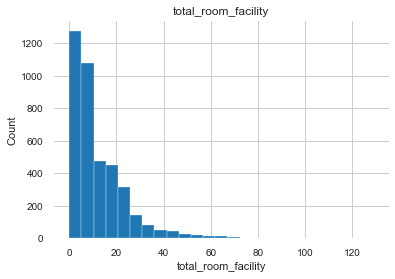

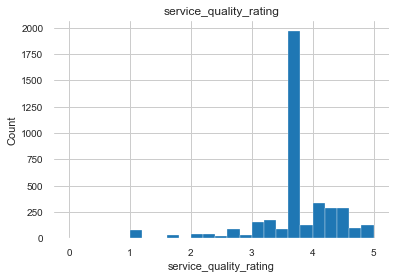

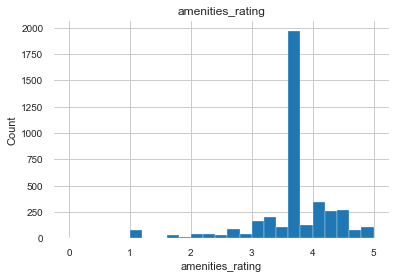

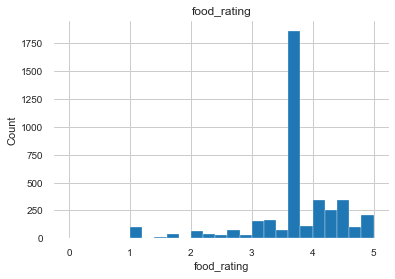

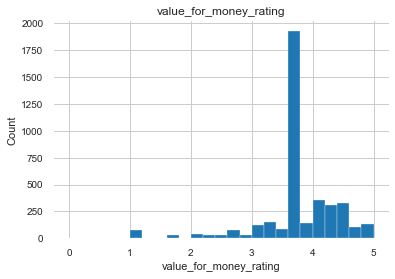

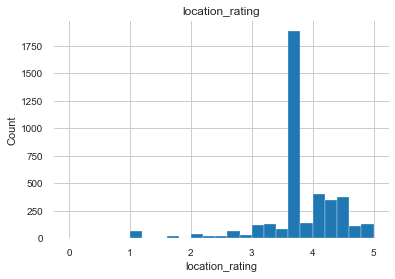

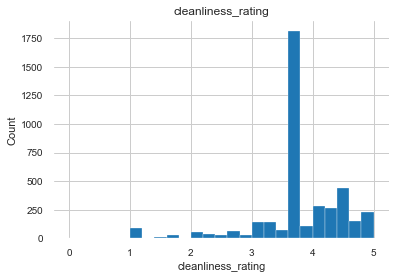

In [164]:
for feature in go.columns:
    data=go.copy()
    if go[feature].dtype in (["int64","float64"]):
        
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()


In [165]:
# Boxplot

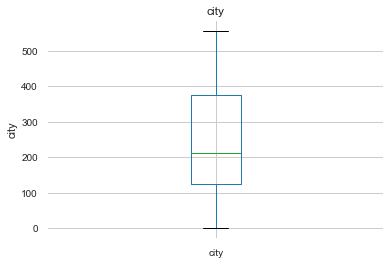

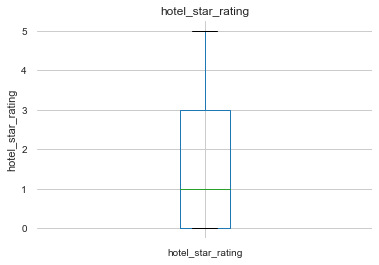

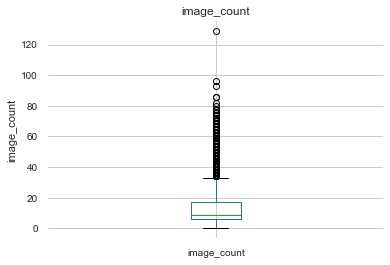

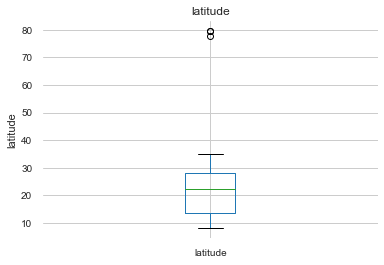

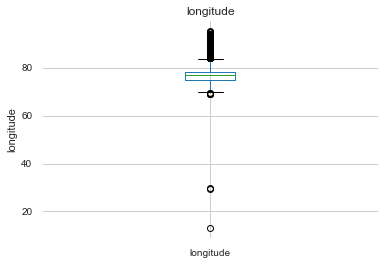

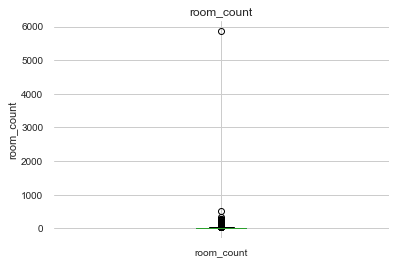

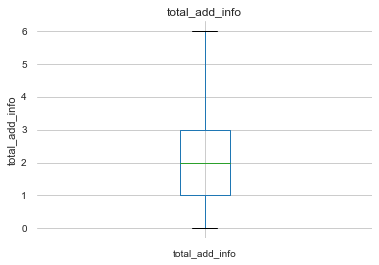

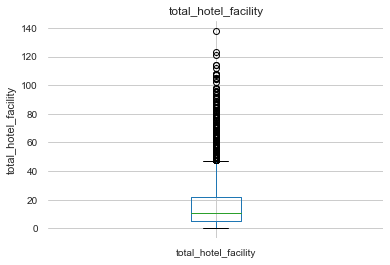

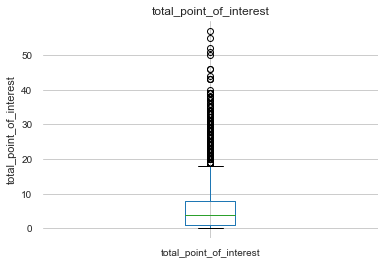

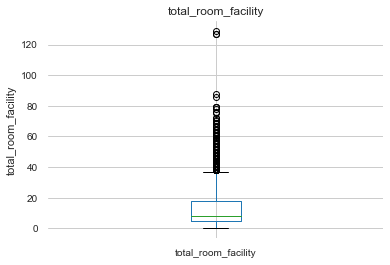

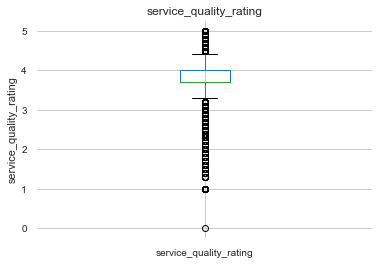

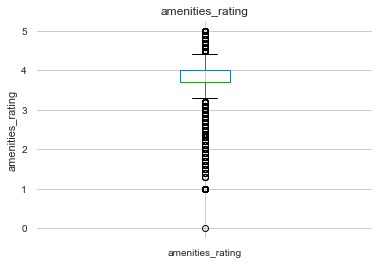

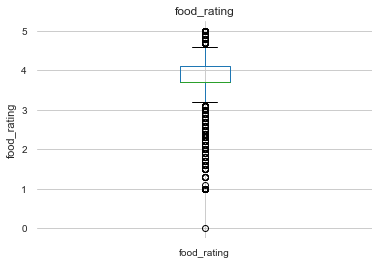

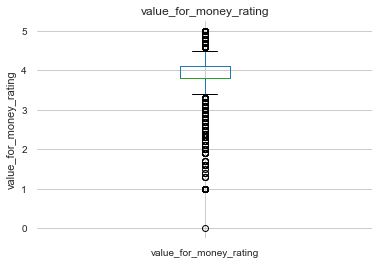

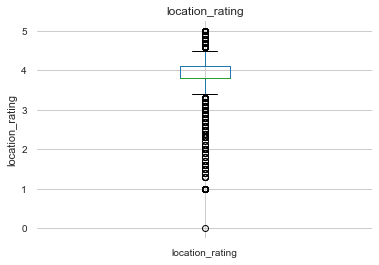

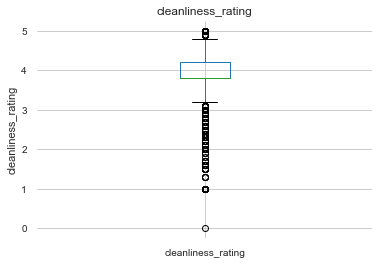

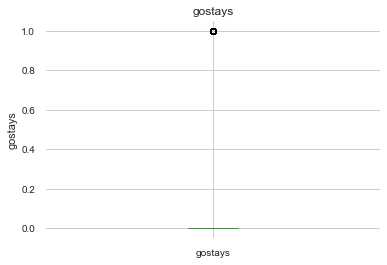

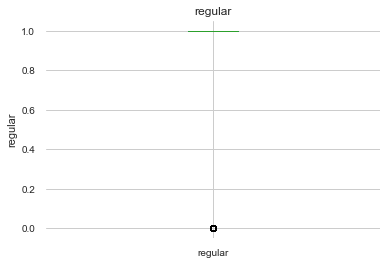

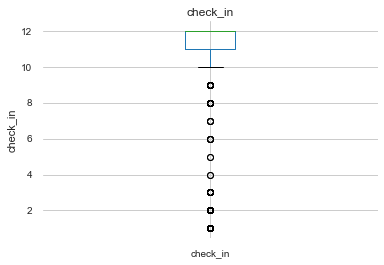

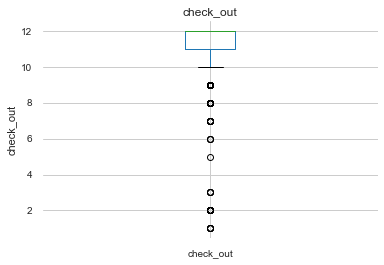

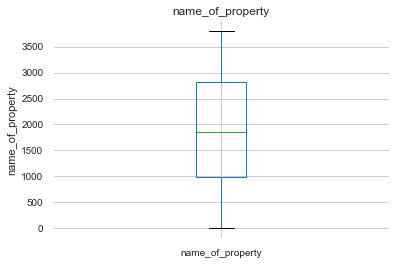

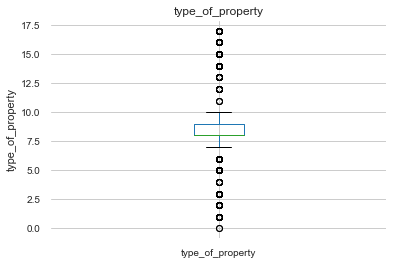

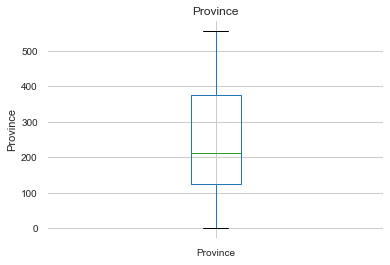

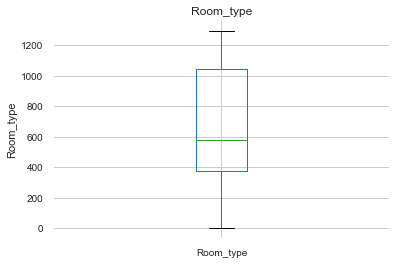

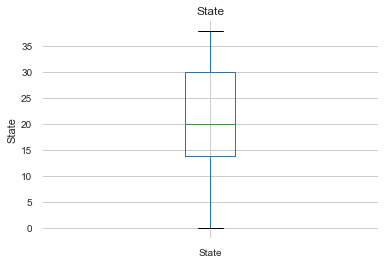

In [166]:
for feature in go.columns:
    data=go.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()


In [167]:
# heat map

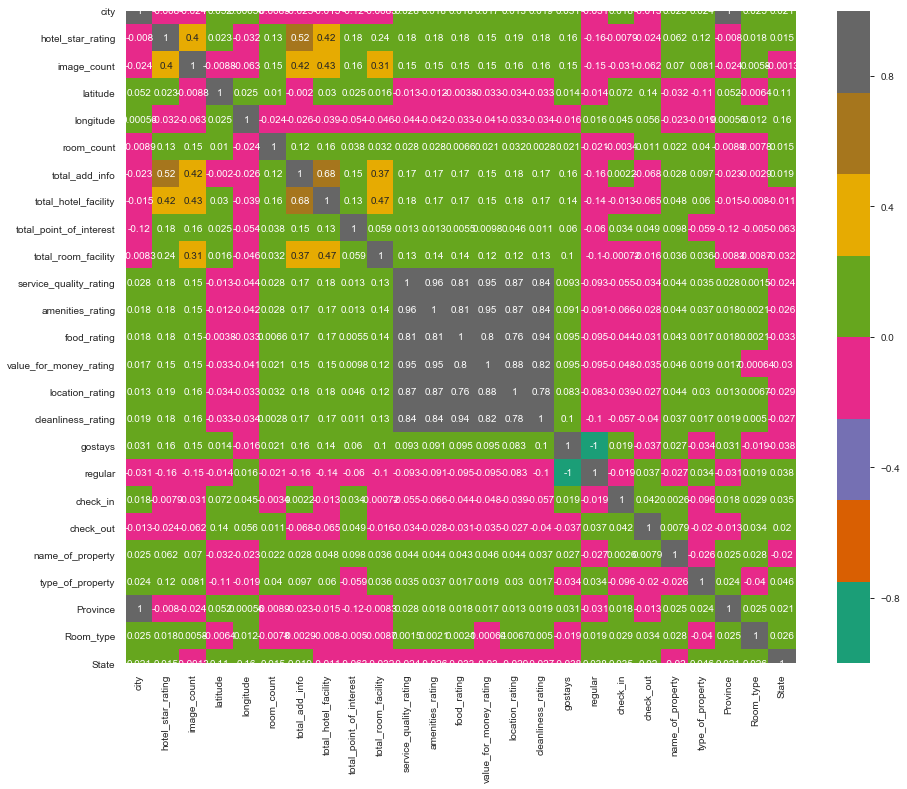

In [168]:
fig=plt.figure(figsize=(15,12))
go_corr=go.corr()
sns.heatmap(go_corr,annot=True,cmap="Dark2")

In [169]:
# scatter matrix

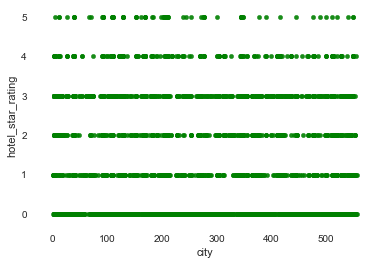

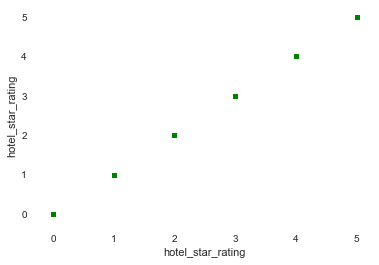

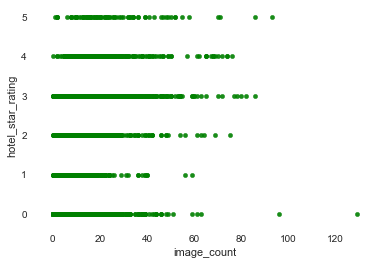

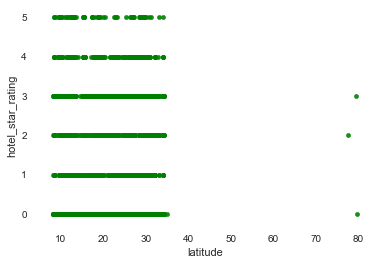

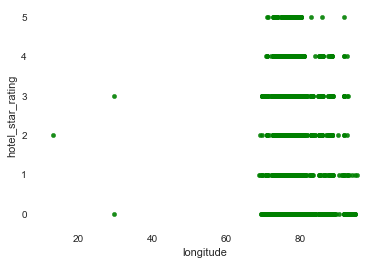

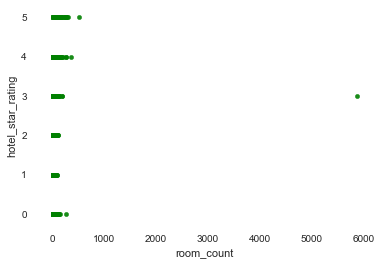

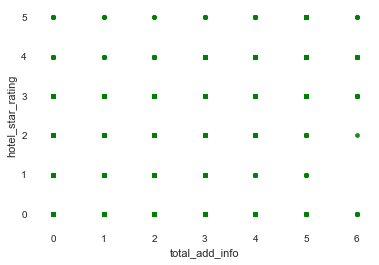

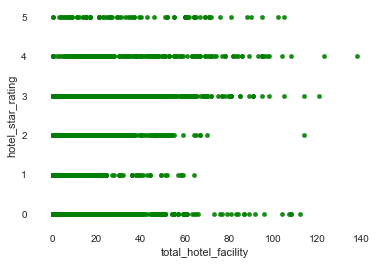

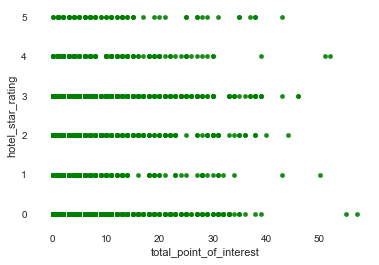

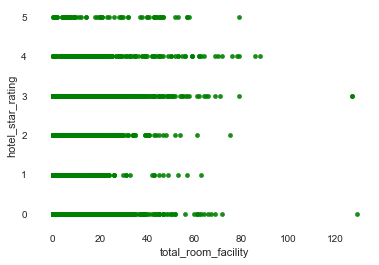

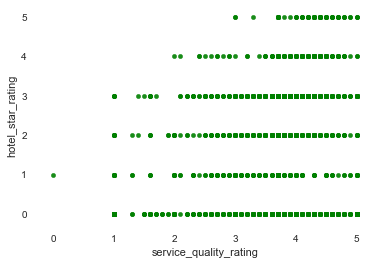

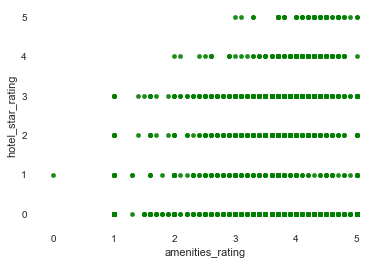

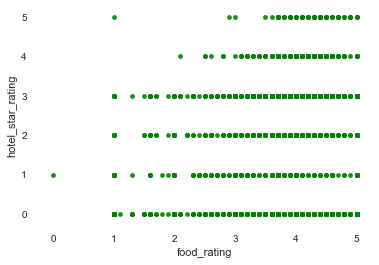

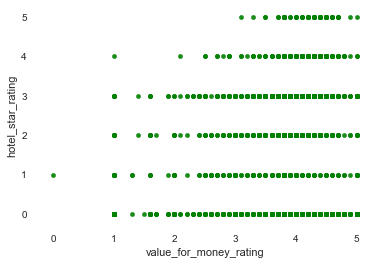

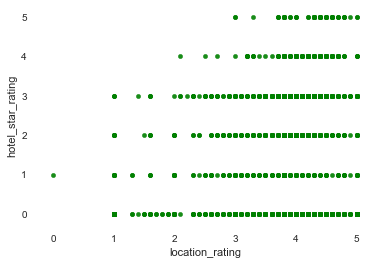

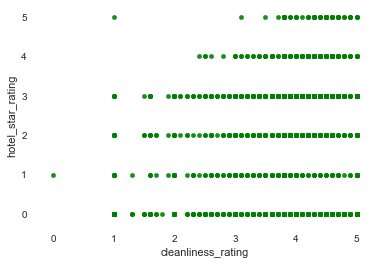

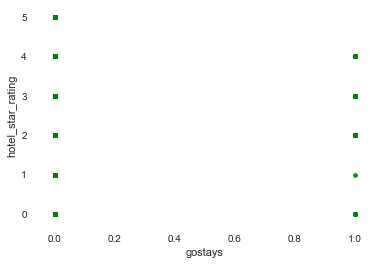

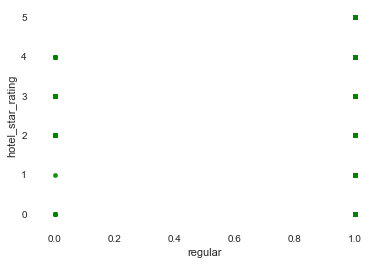

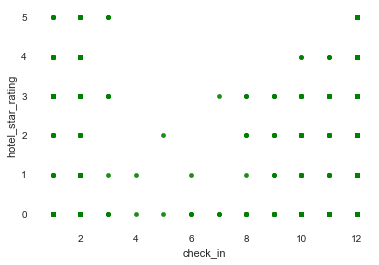

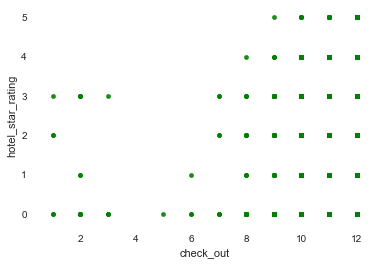

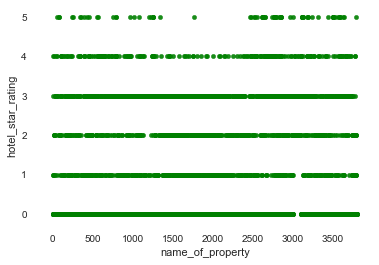

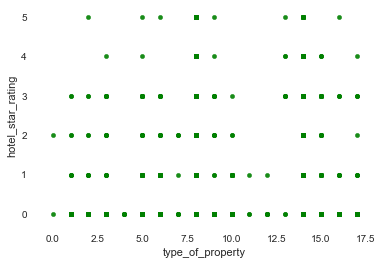

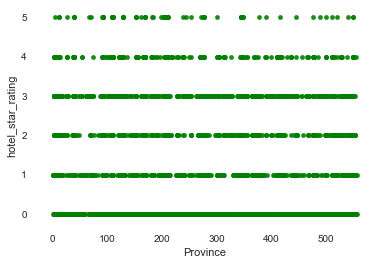

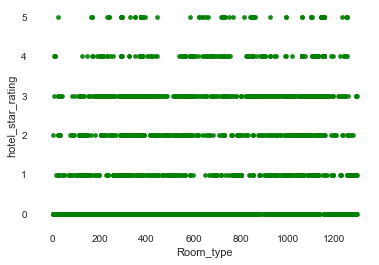

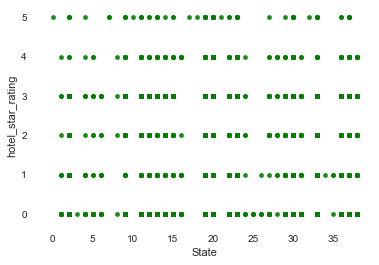

In [178]:
for feature in go.columns:
    go.plot(kind="scatter",x=feature,y="hotel_star_rating",alpha=0.9,color="green")

In [171]:
# barplot

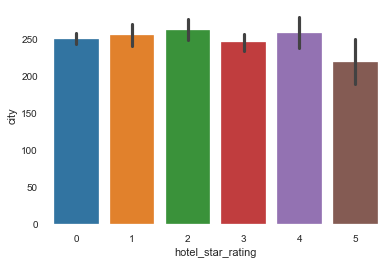

In [174]:
sns.barplot(x="hotel_star_rating",y="city",data=go)

In [ ]:
# dist plot

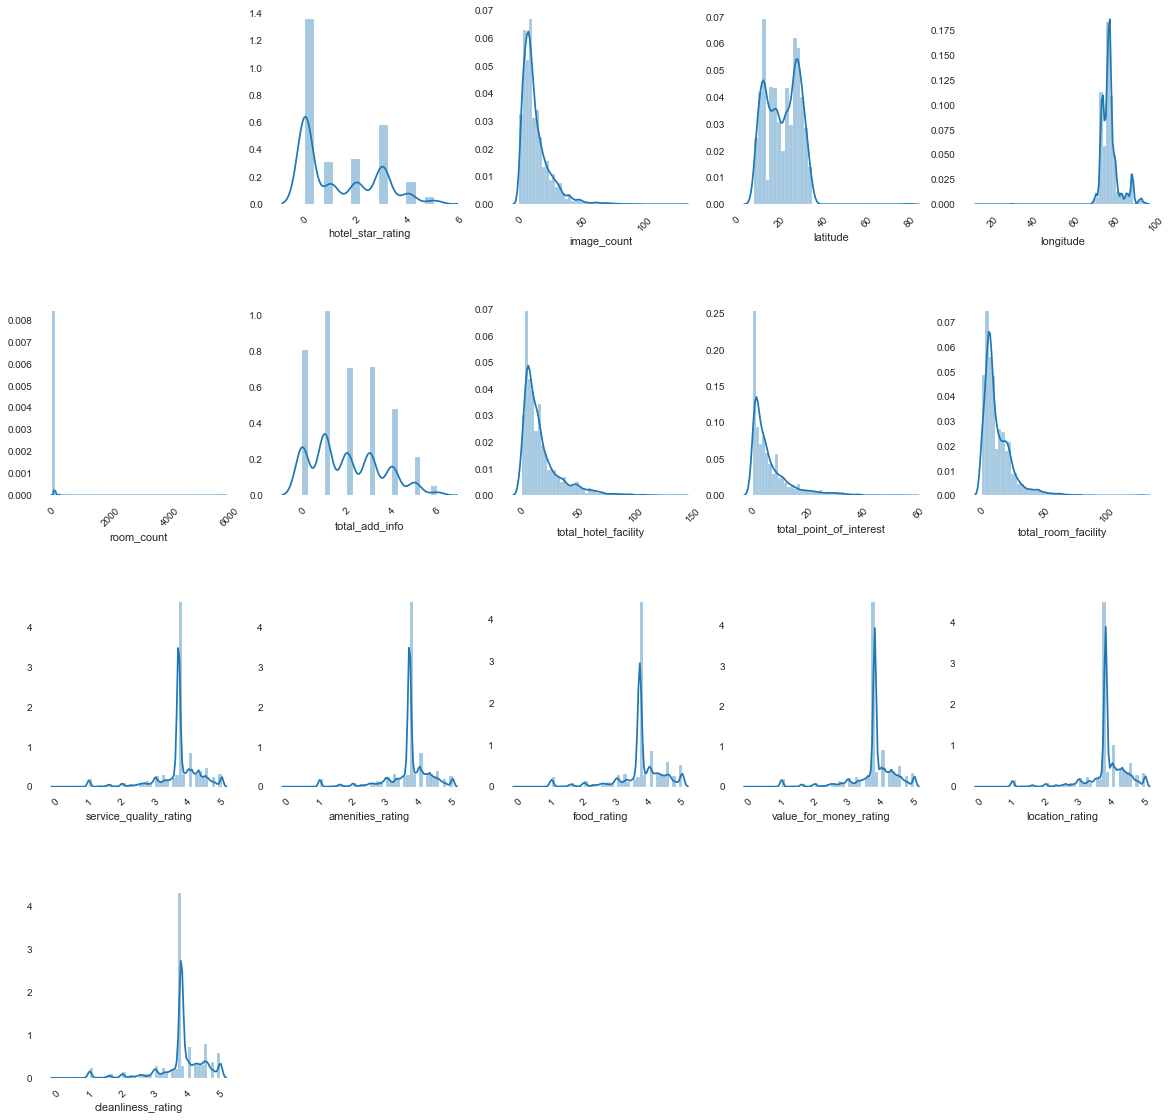

In [173]:
fig=plt.figure(figsize=(20,25))
for index,i in enumerate(go.columns.tolist()):
    if go[i].dtype in (["int64","float64"]):
        plt.subplot(5,5,index+1)
        plt.subplots_adjust(hspace=0.5)
        plt.xticks(rotation=45)
        sns.distplot(go[i])

In [ ]:
# bar chart againt target variable

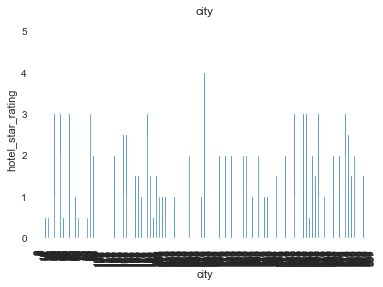

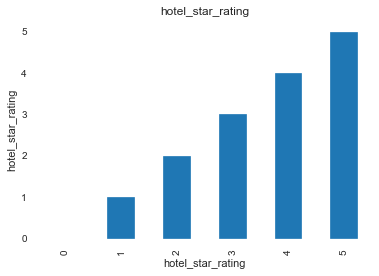

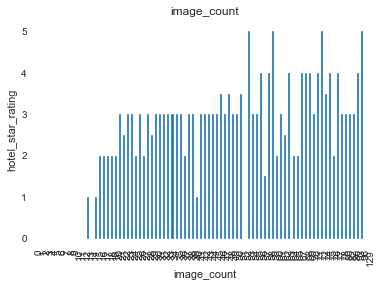

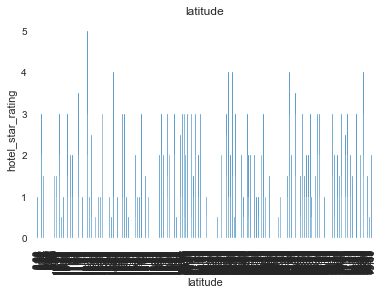

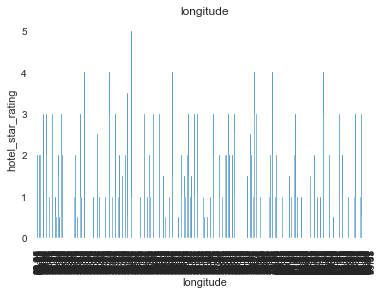

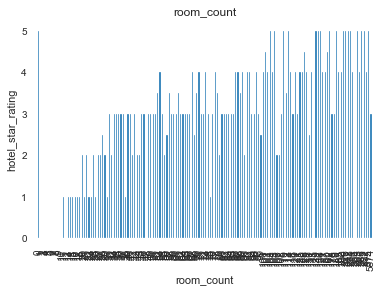

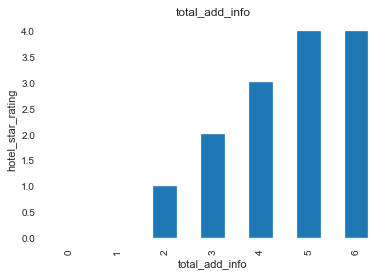

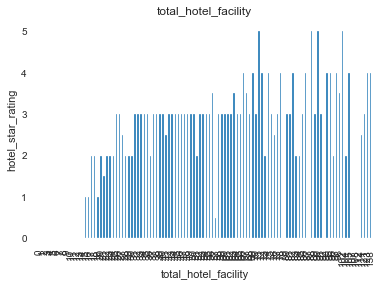

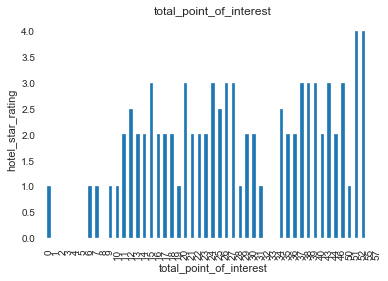

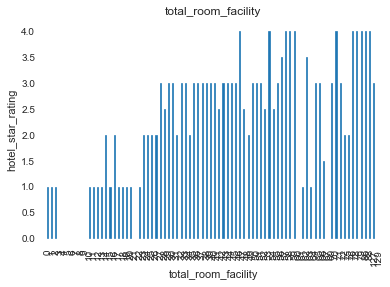

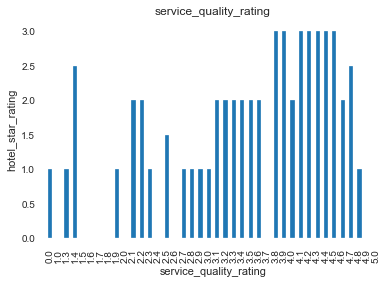

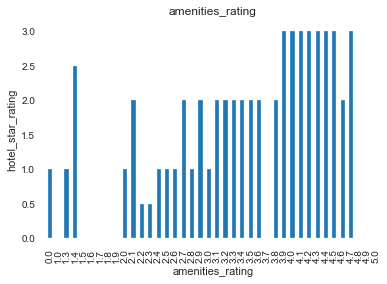

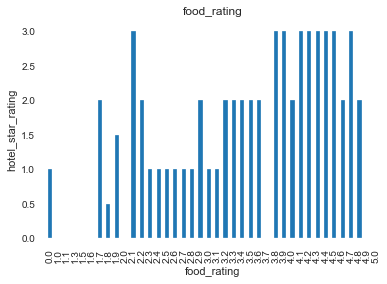

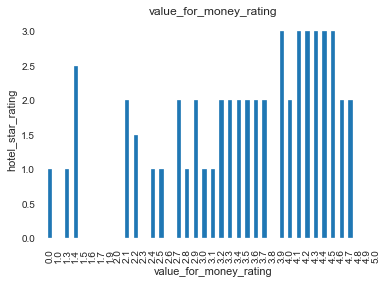

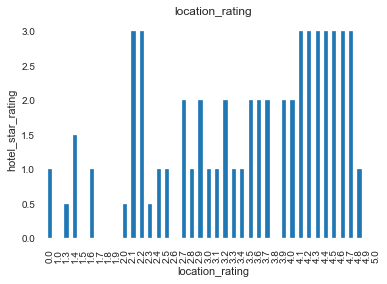

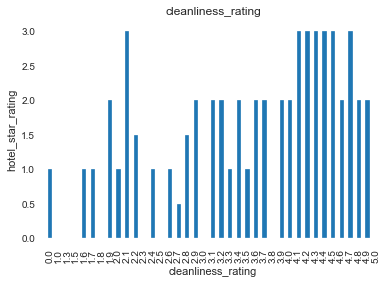

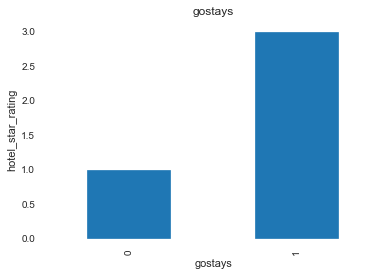

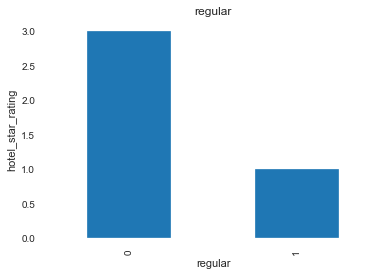

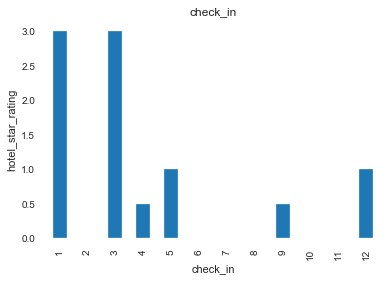

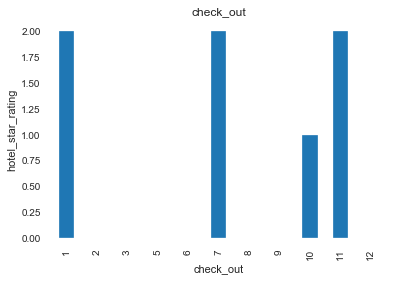

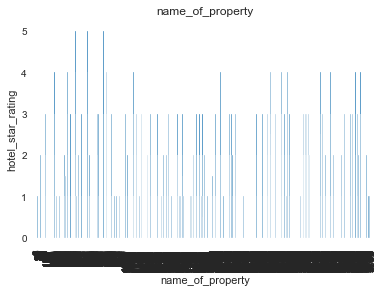

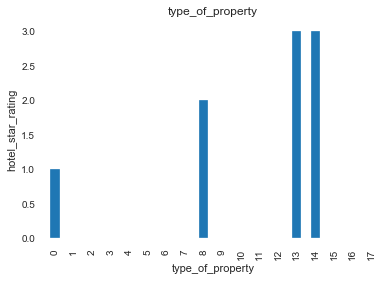

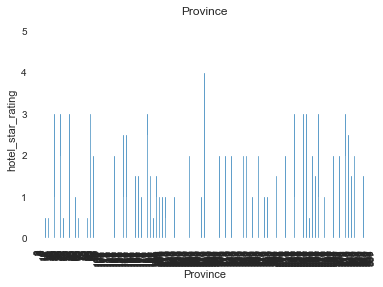

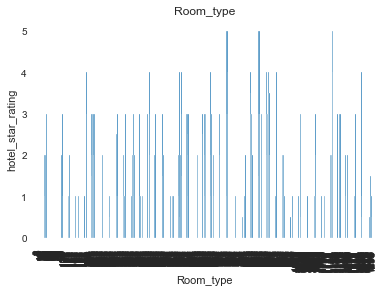

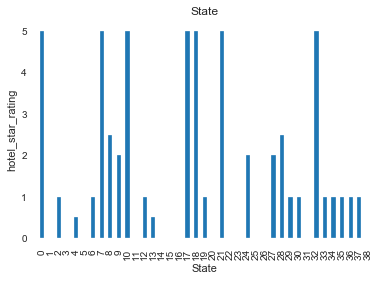

In [176]:
for feature in go.columns:
    data=go.copy()
    data.groupby(feature)["hotel_star_rating"].median().plot.bar()
    plt.title(feature)
    plt.ylabel("hotel_star_rating")
    plt.xlabel(feature)
    plt.show()

In [ ]:
# countplot

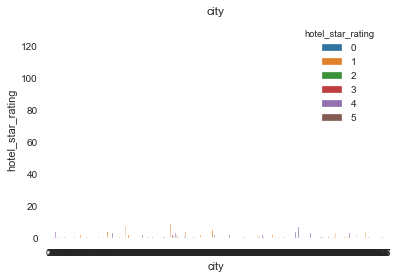

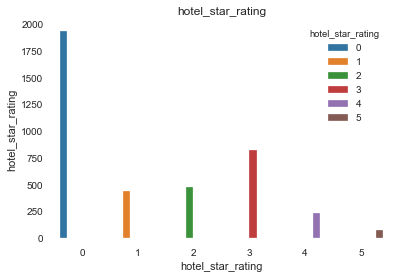

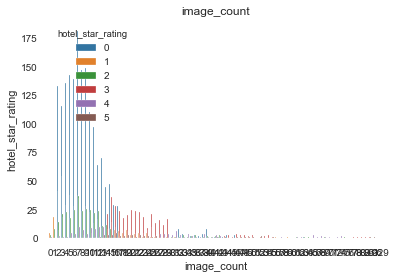

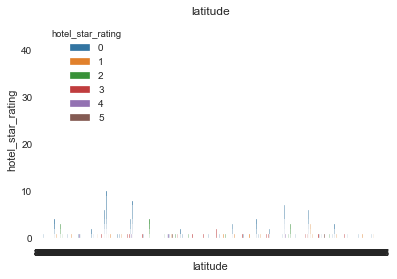

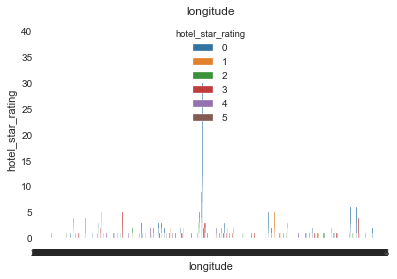

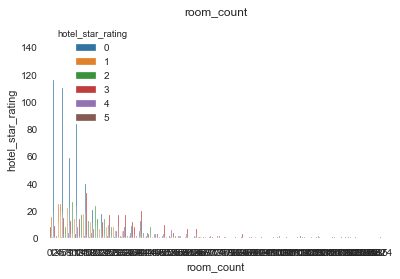

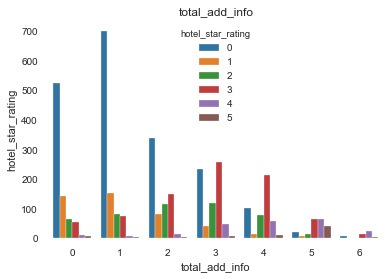

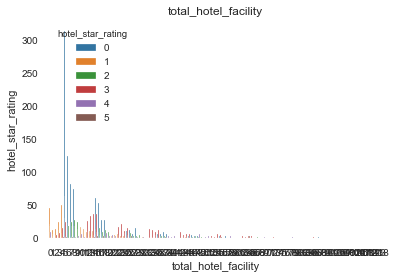

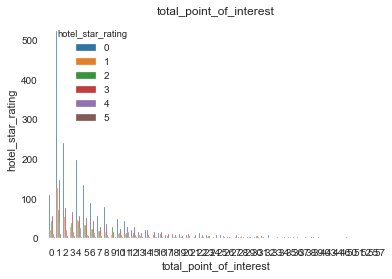

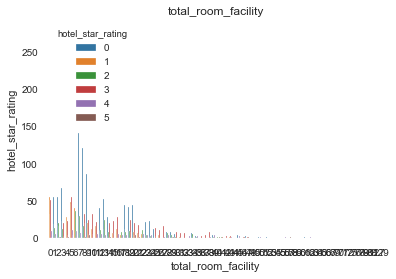

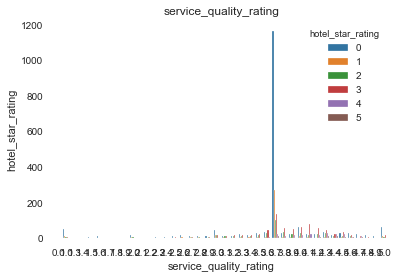

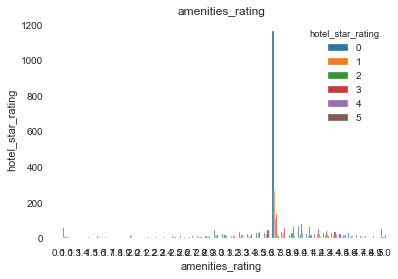

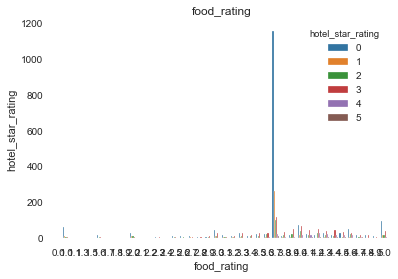

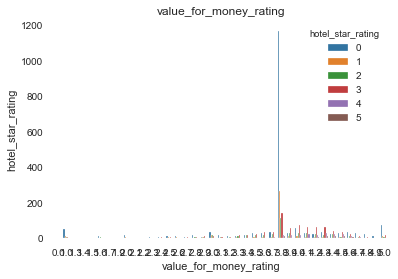

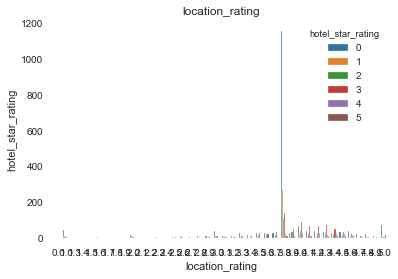

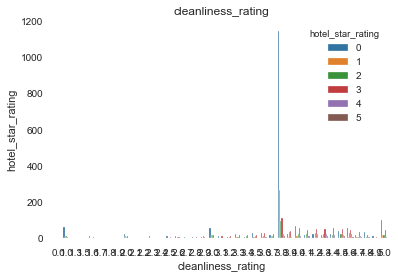

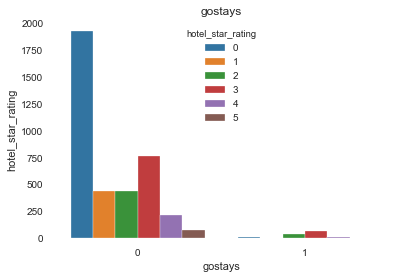

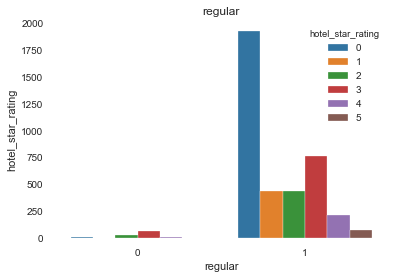

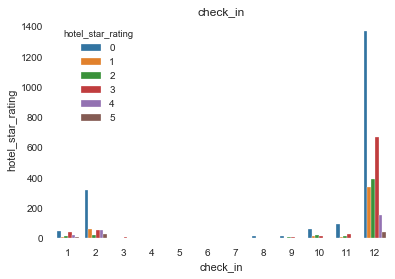

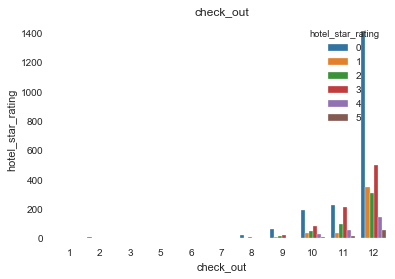

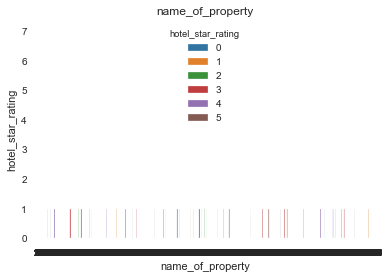

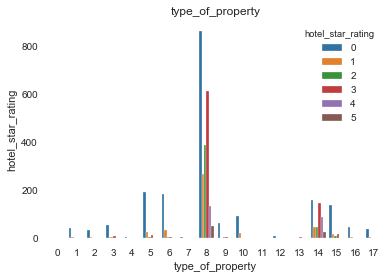

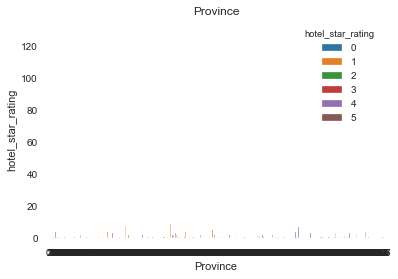

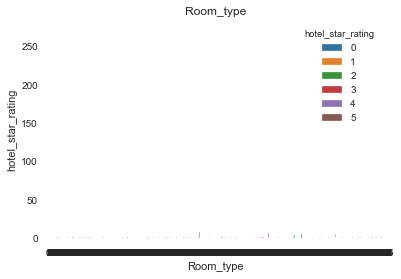

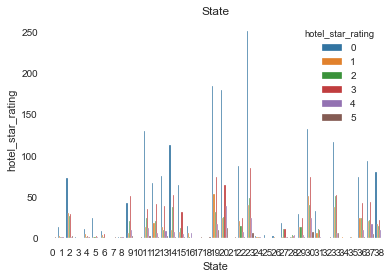

In [182]:
for feature in go.columns:
    data=go.copy()
    sns.countplot(x=feature,hue="hotel_star_rating",data=data)
    plt.xlabel(feature)
    plt.ylabel("hotel_star_rating")
    plt.title(feature)
    plt.show()    

In [ ]:
# Dividing dataset into dependent and independent variable

In [183]:
y=go["hotel_star_rating"]
x=go.drop("hotel_star_rating",axis=1)

In [ ]:
# Checking for best features (feature importance)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.03994392 0.0578877  0.04392866 0.04416043 0.0583403  0.08546903
 0.06069917 0.04643281 0.05242989 0.03522447 0.04040474 0.03789741
 0.03490239 0.03738477 0.0394952  0.00662241 0.00482628 0.02727405
 0.02685924 0.05015754 0.04357648 0.03967326 0.04684694 0.03956292]


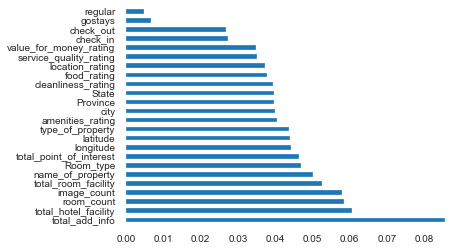

In [207]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [ ]:
# Variance inflation factor to check for multicollinearity

In [220]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [221]:
vif

,VIF Factor,features
0,inf,city
1,1.346500,image_count
2,1.070822,latitude
3,1.040583,longitude
4,1.043782,room_count
5,1.978131,total_add_info
6,2.170154,total_hotel_facility
7,1.085477,total_point_of_interest
8,1.332612,total_room_facility
9,14.702577,service_quality_rating


In [ ]:
# Splitting dataset into train test split format

In [217]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# Printing the shape of splitted dataset

In [218]:
print("Shape of x_train is:",x_train.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of x_test is:",x_test.shape)
print("Shape of y_test is:",y_test.shape)

Shape of x_train is: (2800, 24)
Shape of y_train is: (2800,)
Shape of x_test is: (1200, 24)
Shape of y_test is: (1200,)


In [ ]:
# Applying Machine learning algorithm 

In [ ]:
#  Linear discreminant analysis

In [186]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
prediction=lda.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [ ]:
# Showing output in a dataframe against actual values

In [187]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

      Act  Predicted
555     0          0
3491    2          0
527     4          3
3925    3          0
2989    0          0
70      0          0
1756    4          4
211     4          0
196     0          0
803     3          0
3409    0          0
3836    0          0
1146    4          0
1498    5          0
3858    3          0
3482    0          0
1185    0          0
471     0          0
594     3          0
321     3          3
1417    4          4
1674    1          0
3590    0          0
1703    0          0
2540    1          0
205     3          3
3887    0          0
3248    2          3
2131    2          3
1255    1          0
2299    1          0
1226    0          0
3918    1          0
2464    3          0
2383    1          3
149     4          3
869     3          0
1978    1          0
2456    0          0
3865    0          0
2212    0          3
1006    0          0
3047    0          0
705     1          0
3143    1          0
3596    0          0
1987    0    

In [ ]:
# Evaluating the result

In [188]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.5733333333333334
Kappa is : 0.28982017793795867
Sensitiviy is : 0.5733333333333334
Precision is : 0.5733333333333334
R2 score is: 0.08014665069673677
array([[532,   0,   3,  32,   3,   2],
       [117,   0,   2,   8,   0,   0],
       [ 80,   0,   0,  47,   0,   0],
       [130,   0,   0, 126,  13,   3],
       [ 16,   0,   1,  29,  23,   6],
       [  3,   0,   0,   7,  10,   7]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.61      0.93      0.73       572\n'
 '           1       0.00      0.00      0.00       127\n'
 '           2       0.00      0.00      0.00       127\n'
 '           3       0.51      0.46      0.48       272\n'
 '           4       0.47      0.31      0.37        75\n'
 '           5       0.39      0.26      0.31        27\n'
 '\n'
 '    accuracy                           0.57      1200\n'
 '   macro avg       0.33      0.33      0.32      1200\n'
 'weighted avg       0.44      0.57    

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# Decision tree

In [189]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=20)
dt.fit(x_train,y_train)
prediction=dt.predict(x_test)

In [190]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

      Act  Predicted
555     0          0
3491    2          1
527     4          0
3925    3          0
2989    0          0
70      0          0
1756    4          4
211     4          4
196     0          0
803     3          0
3409    0          0
3836    0          0
1146    4          3
1498    5          2
3858    3          3
3482    0          2
1185    0          0
471     0          0
594     3          0
321     3          0
1417    4          4
1674    1          0
3590    0          5
1703    0          2
2540    1          1
205     3          3
3887    0          5
3248    2          3
2131    2          3
1255    1          0
2299    1          1
1226    0          0
3918    1          0
2464    3          0
2383    1          2
149     4          3
869     3          0
1978    1          0
2456    0          0
3865    0          1
2212    0          3
1006    0          2
3047    0          0
705     1          0
3143    1          2
3596    0          0
1987    0    

In [191]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.47
Kappa is : 0.24014336917562729
Sensitiviy is : 0.47
Precision is : 0.47
R2 score is: 0.02829306768718398
array([[383,  69,  61,  41,  15,   3],
       [ 70,  32,  16,   7,   2,   0],
       [ 35,  20,  33,  30,   7,   2],
       [ 78,  20,  51,  95,  26,   2],
       [ 14,   1,   9,  27,  17,   7],
       [  3,   0,   2,   5,  13,   4]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.66      0.67      0.66       572\n'
 '           1       0.23      0.25      0.24       127\n'
 '           2       0.19      0.26      0.22       127\n'
 '           3       0.46      0.35      0.40       272\n'
 '           4       0.21      0.23      0.22        75\n'
 '           5       0.22      0.15      0.18        27\n'
 '\n'
 '    accuracy                           0.47      1200\n'
 '   macro avg       0.33      0.32      0.32      1200\n'
 'weighted avg       0.48      0.47      0.47      1200\n')


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
# Random forest

In [192]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [193]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

      Act  Predicted
555     0          0
3491    2          0
527     4          3
3925    3          0
2989    0          0
70      0          0
1756    4          4
211     4          0
196     0          0
803     3          0
3409    0          1
3836    0          2
1146    4          4
1498    5          3
3858    3          0
3482    0          3
1185    0          0
471     0          0
594     3          0
321     3          2
1417    4          4
1674    1          0
3590    0          3
1703    0          0
2540    1          0
205     3          0
3887    0          0
3248    2          0
2131    2          3
1255    1          0
2299    1          1
1226    0          0
3918    1          0
2464    3          0
2383    1          3
149     4          3
869     3          0
1978    1          0
2456    0          0
3865    0          0
2212    0          0
1006    0          0
3047    0          0
705     1          0
3143    1          0
3596    0          3
1987    0    

In [194]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.57
Kappa is : 0.32181038948806107
Sensitiviy is : 0.57
Precision is : 0.57
R2 score is: 0.20247728666997733
array([[497,  24,  19,  32,   0,   0],
       [100,  16,   6,   5,   0,   0],
       [ 63,   3,  23,  36,   2,   0],
       [ 91,   5,  43, 121,  11,   1],
       [ 18,   0,   3,  30,  23,   1],
       [  4,   0,   0,   8,  11,   4]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.64      0.87      0.74       572\n'
 '           1       0.33      0.13      0.18       127\n'
 '           2       0.24      0.18      0.21       127\n'
 '           3       0.52      0.44      0.48       272\n'
 '           4       0.49      0.31      0.38        75\n'
 '           5       0.67      0.15      0.24        27\n'
 '\n'
 '    accuracy                           0.57      1200\n'
 '   macro avg       0.48      0.35      0.37      1200\n'
 'weighted avg       0.53      0.57      0.53      1200\n')


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
# KNN

In [195]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

In [196]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

      Act  Predicted
555     0          0
3491    2          3
527     4          0
3925    3          0
2989    0          2
70      0          0
1756    4          0
211     4          4
196     0          0
803     3          3
3409    0          2
3836    0          3
1146    4          0
1498    5          3
3858    3          0
3482    0          2
1185    0          0
471     0          0
594     3          0
321     3          0
1417    4          0
1674    1          0
3590    0          3
1703    0          1
2540    1          1
205     3          0
3887    0          0
3248    2          2
2131    2          0
1255    1          0
2299    1          1
1226    0          0
3918    1          0
2464    3          3
2383    1          0
149     4          0
869     3          0
1978    1          0
2456    0          0
3865    0          0
2212    0          0
1006    0          1
3047    0          0
705     1          0
3143    1          0
3596    0          3
1987    0    

In [197]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.4533333333333333
Kappa is : 0.08662023962295229
Sensitiviy is : 0.4533333333333333
Precision is : 0.4533333333333333
R2 score is: -0.5399053489527039
array([[469,  29,  24,  44,   5,   1],
       [103,  10,   6,   7,   1,   0],
       [ 90,   6,   8,  21,   2,   0],
       [184,  11,  22,  51,   3,   1],
       [ 54,   5,   4,   8,   4,   0],
       [ 14,   0,   0,   9,   2,   2]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.51      0.82      0.63       572\n'
 '           1       0.16      0.08      0.11       127\n'
 '           2       0.12      0.06      0.08       127\n'
 '           3       0.36      0.19      0.25       272\n'
 '           4       0.24      0.05      0.09        75\n'
 '           5       0.50      0.07      0.13        27\n'
 '\n'
 '    accuracy                           0.45      1200\n'
 '   macro avg       0.32      0.21      0.21      1200\n'
 'weighted avg       0.38      0.45    

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
# Bagging classifier

In [198]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
prediction=bc.predict(x_test)

In [199]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

      Act  Predicted
555     0          0
3491    2          3
527     4          2
3925    3          0
2989    0          2
70      0          0
1756    4          4
211     4          4
196     0          0
803     3          0
3409    0          0
3836    0          0
1146    4          0
1498    5          3
3858    3          0
3482    0          2
1185    0          0
471     0          0
594     3          0
321     3          3
1417    4          4
1674    1          1
3590    0          3
1703    0          0
2540    1          1
205     3          0
3887    0          0
3248    2          0
2131    2          3
1255    1          0
2299    1          0
1226    0          1
3918    1          0
2464    3          0
2383    1          2
149     4          3
869     3          3
1978    1          0
2456    0          0
3865    0          0
2212    0          0
1006    0          0
3047    0          0
705     1          0
3143    1          2
3596    0          0
1987    0    

In [200]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.5525
Kappa is : 0.3009268902312019
Sensitiviy is : 0.5525
Precision is : 0.5525
R2 score is: 0.20284245274750945
array([[480,  36,  25,  27,   4,   0],
       [104,  11,   6,   5,   1,   0],
       [ 69,   3,  21,  34,   0,   0],
       [ 90,   9,  42, 118,  13,   0],
       [ 14,   0,   7,  27,  26,   1],
       [  3,   0,   0,   5,  12,   7]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.63      0.84      0.72       572\n'
 '           1       0.19      0.09      0.12       127\n'
 '           2       0.21      0.17      0.18       127\n'
 '           3       0.55      0.43      0.48       272\n'
 '           4       0.46      0.35      0.40        75\n'
 '           5       0.88      0.26      0.40        27\n'
 '\n'
 '    accuracy                           0.55      1200\n'
 '   macro avg       0.49      0.36      0.38      1200\n'
 'weighted avg       0.52      0.55      0.52      1200\n')


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
# Extra trees classifier

In [201]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
prediction=etc.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [202]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

      Act  Predicted
555     0          0
3491    2          1
527     4          3
3925    3          0
2989    0          2
70      0          0
1756    4          4
211     4          0
196     0          0
803     3          0
3409    0          1
3836    0          0
1146    4          3
1498    5          0
3858    3          0
3482    0          0
1185    0          0
471     0          1
594     3          0
321     3          3
1417    4          4
1674    1          0
3590    0          3
1703    0          0
2540    1          0
205     3          3
3887    0          0
3248    2          3
2131    2          3
1255    1          0
2299    1          0
1226    0          0
3918    1          0
2464    3          0
2383    1          3
149     4          3
869     3          2
1978    1          0
2456    0          0
3865    0          0
2212    0          0
1006    0          0
3047    0          0
705     1          0
3143    1          3
3596    0          3
1987    0    

In [203]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.5425
Kappa is : 0.2655092602915665
Sensitiviy is : 0.5425
Precision is : 0.5425
R2 score is: 0.10388244573632077
array([[498,  23,  20,  27,   4,   0],
       [111,   4,   4,   8,   0,   0],
       [ 69,   4,  12,  42,   0,   0],
       [103,   7,  28, 119,  14,   1],
       [ 22,   1,   2,  34,  12,   4],
       [  5,   0,   1,   6,   9,   6]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.62      0.87      0.72       572\n'
 '           1       0.10      0.03      0.05       127\n'
 '           2       0.18      0.09      0.12       127\n'
 '           3       0.50      0.44      0.47       272\n'
 '           4       0.31      0.16      0.21        75\n'
 '           5       0.55      0.22      0.32        27\n'
 '\n'
 '    accuracy                           0.54      1200\n'
 '   macro avg       0.38      0.30      0.31      1200\n'
 'weighted avg       0.47      0.54      0.49      1200\n')


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
# SGD Classifier

In [204]:
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
prediction=sgd.predict(x_test)

In [205]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

      Act  Predicted
555     0          0
3491    2          1
527     4          0
3925    3          1
2989    0          1
70      0          1
1756    4          1
211     4          3
196     0          1
803     3          1
3409    0          1
3836    0          1
1146    4          1
1498    5          1
3858    3          1
3482    0          1
1185    0          1
471     0          0
594     3          1
321     3          3
1417    4          1
1674    1          0
3590    0          1
1703    0          0
2540    1          1
205     3          5
3887    0          1
3248    2          1
2131    2          1
1255    1          1
2299    1          1
1226    0          1
3918    1          1
2464    3          1
2383    1          1
149     4          4
869     3          0
1978    1          1
2456    0          1
3865    0          1
2212    0          1
1006    0          1
3047    0          1
705     1          1
3143    1          1
3596    0          1
1987    0    

In [206]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.1925
Kappa is : 0.04503637370055791
Sensitiviy is : 0.1925
Precision is : 0.1925
R2 score is: 0.05093336449417185
array([[105, 458,   7,   0,   2,   0],
       [ 18, 105,   3,   0,   1,   0],
       [ 17, 102,   6,   0,   2,   0],
       [ 15, 210,  27,   4,  13,   3],
       [  4,  40,  15,   2,  11,   3],
       [  1,  14,  12,   0,   0,   0]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.66      0.18      0.29       572\n'
 '           1       0.11      0.83      0.20       127\n'
 '           2       0.09      0.05      0.06       127\n'
 '           3       0.67      0.01      0.03       272\n'
 '           4       0.38      0.15      0.21        75\n'
 '           5       0.00      0.00      0.00        27\n'
 '\n'
 '    accuracy                           0.19      1200\n'
 '   macro avg       0.32      0.20      0.13      1200\n'
 'weighted avg       0.51      0.19      0.18      1200\n')


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [209]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

In [210]:
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3,random_state=42)

In [214]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [215]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

      Act  Predicted
555     0          0
3491    2          0
527     4          2
3925    3          0
2989    0          0
70      0          0
1756    4          4
211     4          2
196     0          0
803     3          0
3409    0          1
3836    0          0
1146    4          5
1498    5          0
3858    3          1
3482    0          0
1185    0          0
471     0          0
594     3          2
321     3          3
1417    4          4
1674    1          0
3590    0          4
1703    0          0
2540    1          1
205     3          3
3887    0          0
3248    2          3
2131    2          3
1255    1          0
2299    1          0
1226    0          0
3918    1          0
2464    3          0
2383    1          3
149     4          3
869     3          3
1978    1          0
2456    0          0
3865    0          0
2212    0          0
1006    0          0
3047    0          0
705     1          0
3143    1          0
3596    0          0
1987    0    

In [216]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.5591666666666667
Kappa is : 0.30160483463723153
Sensitiviy is : 0.5591666666666667
Precision is : 0.5591666666666667
R2 score is: 0.16523034676170711
array([[494,  24,  22,  30,   2,   0],
       [103,  13,   3,   8,   0,   0],
       [ 65,   4,  13,  43,   2,   0],
       [ 97,   6,  35, 121,  12,   1],
       [ 18,   0,   4,  29,  23,   1],
       [  4,   0,   0,   7,   9,   7]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.63      0.86      0.73       572\n'
 '           1       0.28      0.10      0.15       127\n'
 '           2       0.17      0.10      0.13       127\n'
 '           3       0.51      0.44      0.47       272\n'
 '           4       0.48      0.31      0.37        75\n'
 '           5       0.78      0.26      0.39        27\n'
 '\n'
 '    accuracy                           0.56      1200\n'
 '   macro avg       0.47      0.35      0.37      1200\n'
 'weighted avg       0.51      0.56    

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
# We can say that our data fits well on using Random forest

In [ ]:
# model evaluation

In [219]:
model=sm.ols(formula=(y_test,x_test) ,data=go)
fitted=model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      hotel_star_rating   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     39.01
Date:                Mon, 24 Feb 2020   Prob (F-statistic):          2.95e-123
Time:                        12:00:56   Log-Likelihood:                -1869.2
No. Observations:                1200   AIC:                             3784.
Df Residuals:                    1177   BIC:                             3901.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
city                     8.915e-05      0.000      0.842      0.400      -0.000       0.000
image_count                 0.0236      0.004      6.673      0.000       0.017       0.031
latitude                    0.0011      0.004      0.256      0.798      -0.008       0.010
longitude                  -0.0054      0.007     -0.751      0.453      -0.019       0.009
room_count                  0.0102      0.001      8.510      0.000       0.008       0.013
total_add_info              0.2787      0.032      8.758      0.000       0.216       0.341
total_hotel_facility        0.0091      0.003      3.212      0.001       0.004       0.015
total_point_of_interest     0.0066      0.005      1.356      0.175      -0.003       0.016
total_room_facility        -0.0002      0.003     -0.076      0.940      -0.006       0.006
service_quality_rating      0.3692      0.192      1.920      0.055      -0.008       0.746
amenities_rating            0.0535      0.184      0.290      0.772      -0.308       0.415
food_rating                -0.1116      0.136     -0.821      0.412      -0.378       0.155
value_for_money_rating     -0.4887      0.182     -2.690      0.007      -0.845      -0.132
location_rating             0.0054      0.120      0.045      0.964      -0.229       0.240
cleanliness_rating          0.3339      0.138      2.412      0.016       0.062       0.605
gostays                    -0.4898      0.710     -0.690      0.491      -1.883       0.904
regular                    -0.7798      0.682     -1.143      0.253      -2.118       0.558
check_in                    0.0054      0.009      0.603      0.547      -0.012       0.023
check_out                   0.0180      0.030      0.602      0.547      -0.041       0.077
name_of_property         2.586e-05   3.09e-05      0.837      0.403   -3.48e-05    8.65e-05
type_of_property            0.0299      0.010      2.864      0.004       0.009       0.050
Province                 8.915e-05      0.000      0.842      0.400      -0.000       0.000
Room_type                5.985e-05   9.29e-05      0.644      0.520      -0.000       0.000
State                      -0.0001      0.004     -0.041      0.967      -0.007       0.007
==============================================================================
Omnibus:                       19.248   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.791
Skew:                           0.267   Prob(JB):                     3.06e-05
Kurtosis:                       3.363   Cond. No.                     9.20e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigen

In [ ]:
# Thank you